In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import json
from dataclasses import dataclass

In [2]:
@dataclass
class Run:
    timestamp: int
    mode: str
    function_name: str
    input_length: str
    duration_nanoseconds: int

In [3]:
def format_duration(ns):
    # Convert to seconds
    time_in_s = ns / 1e9
    if time_in_s < 1e-6:  # Less than a microsecond
        return f"{ns} ns"
    elif time_in_s < 1e-3:  # Less than a millisecond
        return f"{ns / 1e3:.2f} µs"
    elif time_in_s < 1:  # Less than a second
        return f"{ns / 1e6:.2f} ms"
    else:  # Seconds
        return f"{time_in_s:.2f} s"
format_duration(257500)

'257.50 µs'

In [4]:
readme_content = """
# Advent of Code 2023
""".strip()

day-01
day-02


StopIteration: 

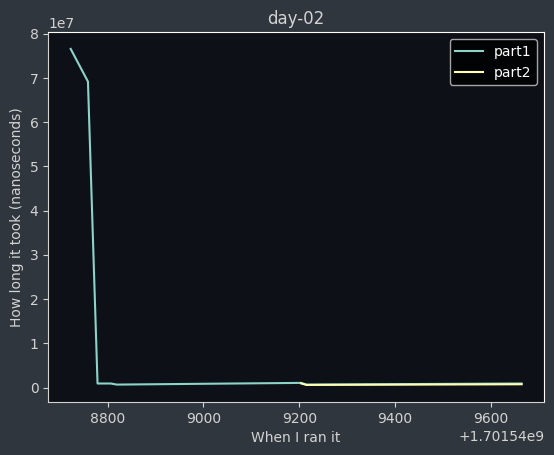

In [5]:
for folder in Path(".").glob("day-*"):
    print(folder)
    readme_content += f"\n\n## {folder.name.title()}\n\n"
    content = (folder / "function_times.log").read_text()
    runs = [Run(**json.loads(line)) for line in content.splitlines()]
    runs_by_function = {}
    for run in runs:
        runs_by_function.setdefault(run.function_name, []).append(run)

    # Set the plot style
    plt.style.use('dark_background')

    # Create the plot
    fig, ax = plt.subplots()
    for function_name, group in runs_by_function.items():
        ax.plot([run.timestamp for run in group], [run.duration_nanoseconds for run in group], label=function_name)

    # Set the facecolor to dark gray
    ax.set_facecolor('#0d1117')

    # Set the text color to light gray for visibility against the dark background
    ax.tick_params(colors='lightgray', which='both')  # Change the color of ticks
    ax.spines['bottom'].set_color('lightgray')
    ax.spines['left'].set_color('lightgray')

    # Set the labels and title
    ax.legend()
    ax.set_xlabel("When I ran it", color='lightgray')
    ax.set_ylabel("How long it took (nanoseconds)", color='lightgray')
    ax.set_title(folder.name, color='lightgray')

    # Set the margin color
    fig.patch.set_facecolor('#30363d')

    # Save the plot to a PNG file
    output_file_path = folder / f"{folder.name}.png"
    plt.savefig(output_file_path, facecolor=fig.get_facecolor(), edgecolor='none')
    output_file_path = str(output_file_path).replace("\\", "/")
    
    readme_content += f"![execution time for {folder.name}]({output_file_path})\n\n"
    latest_part2_debug = format_duration(next(run for run in runs[::-1] if run.mode == "debug" and run.function_name == "part2").duration_nanoseconds)
    latest_part1_debug = format_duration(next(run for run in runs[::-1] if run.mode == "debug" and run.function_name == "part1").duration_nanoseconds)
    latest_part1_release = format_duration(next(run for run in runs[::-1] if run.mode == "release" and run.function_name == "part1").duration_nanoseconds)
    latest_part2_release = format_duration(next(run for run in runs[::-1] if run.mode == "release" and run.function_name == "part2").duration_nanoseconds)

    readme_content += f"""| Mode | Part 1 | Part 2 |
|--------|--------|--------|
| Debug | {latest_part1_debug} | {latest_part2_debug} |
| Release | {latest_part1_release} | {latest_part2_release} |
""".strip()

    # Close the plot to free memory
    plt.close(fig)

In [ ]:
with open("README.md","w",encoding="utf-8") as f:
    f.write(readme_content)